In [1]:
import os
import pandas as pd


data = []


base_path = "C:\\Users\\devar\\Downloads\\IIITM_Face_Emotion_dataset-20240908T082705Z-001\\IIITM_Face_Emotion_dataset"


for subject_id in range(1, 108):  # From SUB1 to SUB107
    
    if subject_id < 10:
        folder_name = f'SUB{subject_id}'
        file_prefix = f'SUB{subject_id}'
        expression_start = 4
        expression_end = 6
        orientation_index = 6
    elif subject_id < 100:
        folder_name = f'SUB{subject_id}'
        file_prefix = f'SUB{subject_id:02}'
        expression_start = 5
        expression_end = 7
        orientation_index = 7
    else:
        folder_name = f'SUB{subject_id}'
        file_prefix = f'SUB{subject_id:03}'
        expression_start = 6
        expression_end = 8
        orientation_index = 8

  
    folder_path = os.path.join(base_path, folder_name)

    
    if os.path.exists(folder_path):
        for file_name in os.listdir(folder_path):
           
            if file_name.startswith(file_prefix):
                
                expression = file_name[expression_start:expression_end]  # Extracts expression
                orientation = file_name[orientation_index]               # Extracts orientation

                file_path = os.path.join(folder_path, file_name)

               
                data.append([subject_id, expression, orientation, file_path])


df = pd.DataFrame(data, columns=['Subject ID', 'Expression', 'Orientation', 'File Path'])


print(df)


      Subject ID Expression Orientation  \
0              1         NE           D   
1              1         NE           F   
2              1         NE           U   
3              1         SA           D   
4              1         SA           F   
...          ...        ...         ...   
1921         107         SU           F   
1922         107         SU           U   
1923         107         YN           D   
1924         107         YN           F   
1925         107         YN           U   

                                              File Path  
0     C:\Users\devar\Downloads\IIITM_Face_Emotion_da...  
1     C:\Users\devar\Downloads\IIITM_Face_Emotion_da...  
2     C:\Users\devar\Downloads\IIITM_Face_Emotion_da...  
3     C:\Users\devar\Downloads\IIITM_Face_Emotion_da...  
4     C:\Users\devar\Downloads\IIITM_Face_Emotion_da...  
...                                                 ...  
1921  C:\Users\devar\Downloads\IIITM_Face_Emotion_da...  
1922  C:\Users\deva

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926 entries, 0 to 1925
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Subject ID   1926 non-null   int64 
 1   Expression   1926 non-null   object
 2   Orientation  1926 non-null   object
 3   File Path    1926 non-null   object
dtypes: int64(1), object(3)
memory usage: 60.3+ KB
None

First 5 rows of the dataset:
   Subject ID Expression Orientation  \
0           1         NE           D   
1           1         NE           F   
2           1         NE           U   
3           1         SA           D   
4           1         SA           F   

                                           File Path  
0  C:\Users\devar\Downloads\IIITM_Face_Emotion_da...  
1  C:\Users\devar\Downloads\IIITM_Face_Emotion_da...  
2  C:\Users\devar\Downloads\IIITM_Face_Emotion_da...  
3  C:\Users\devar\Downloads\IIITM_Face_Emotion_da...  
4  C:\Users\devar\Downloads\

C:\Users\devar\AppData\Local\Temp\ipykernel_22532\1559489813.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Expression', data=df, palette='Set2')


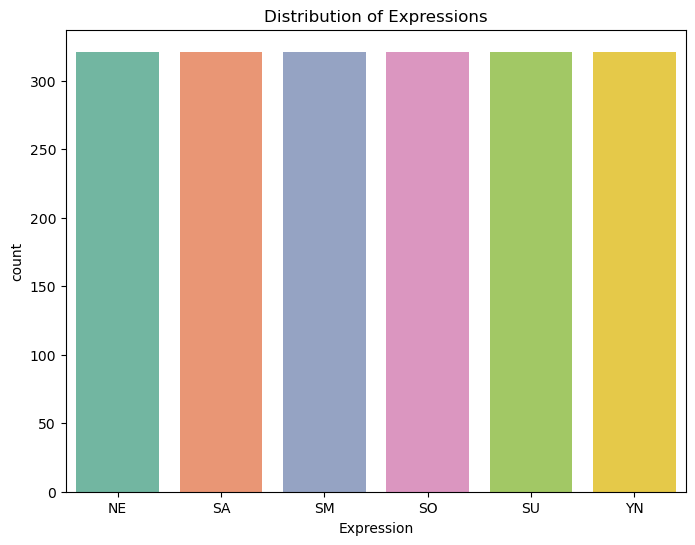

C:\Users\devar\AppData\Local\Temp\ipykernel_22532\1559489813.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Orientation', data=df, palette='Set2')


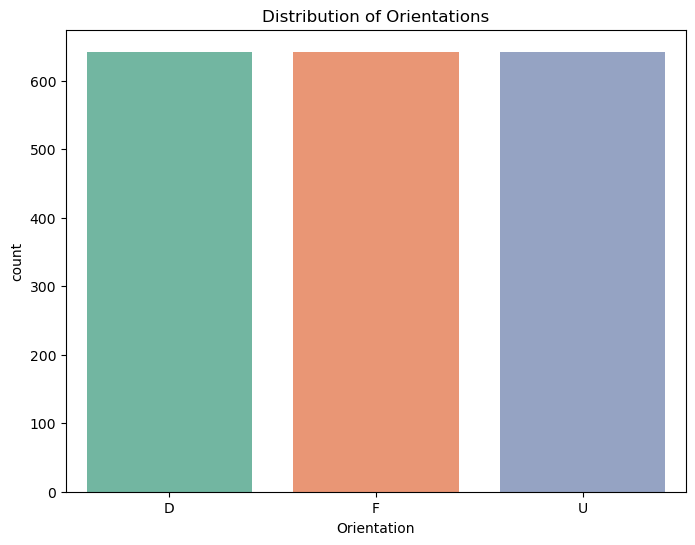

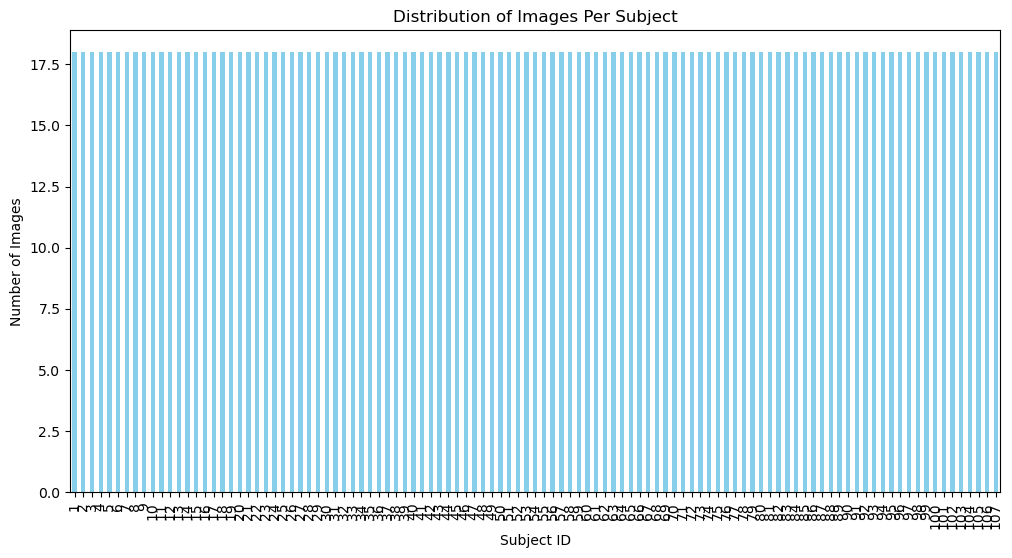

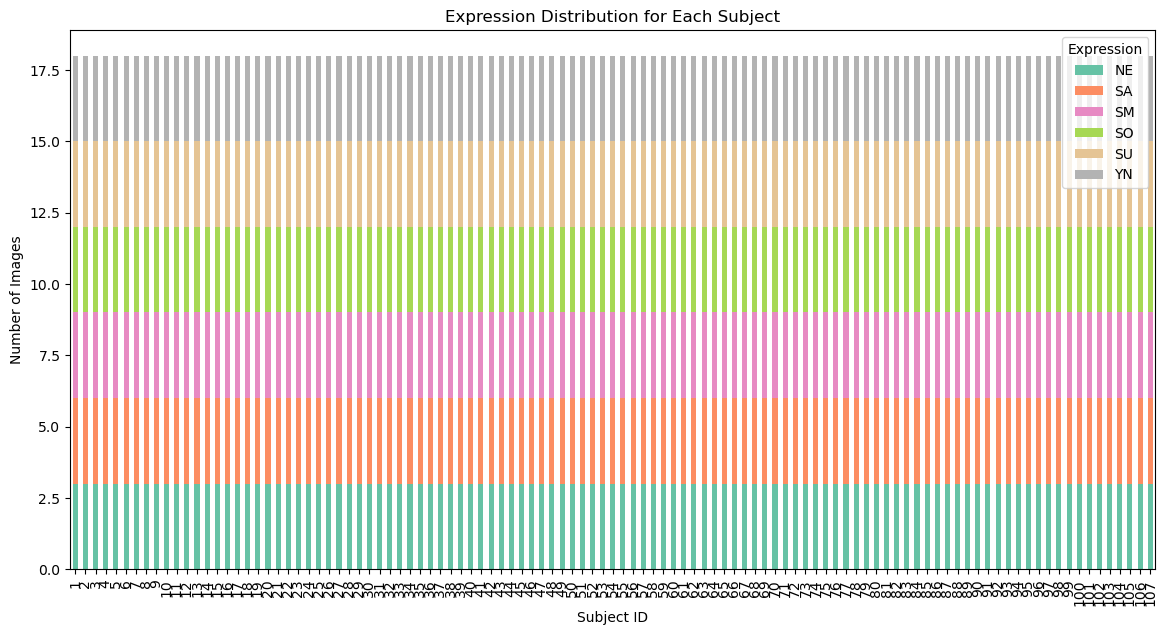

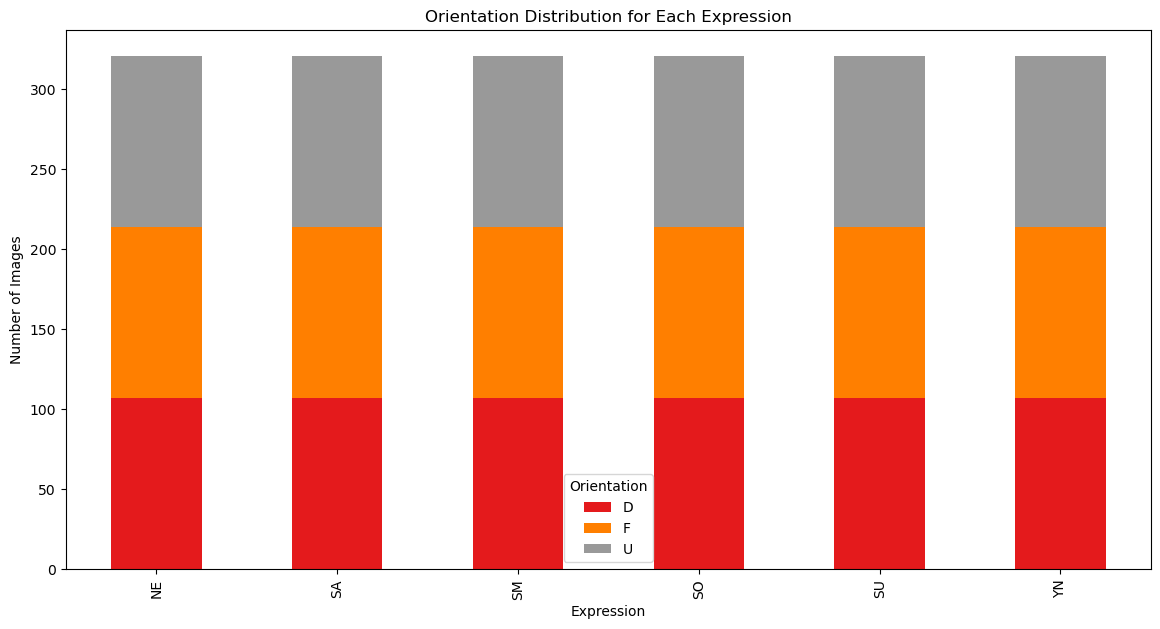

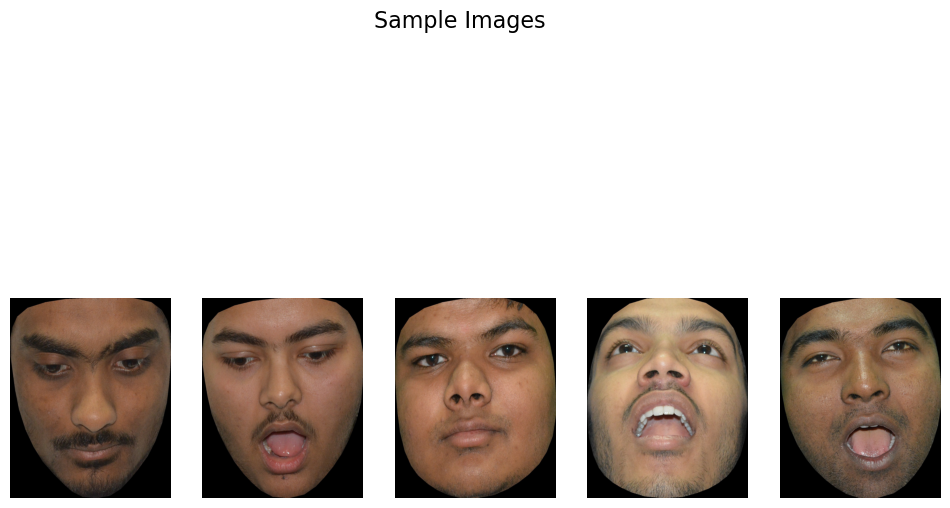

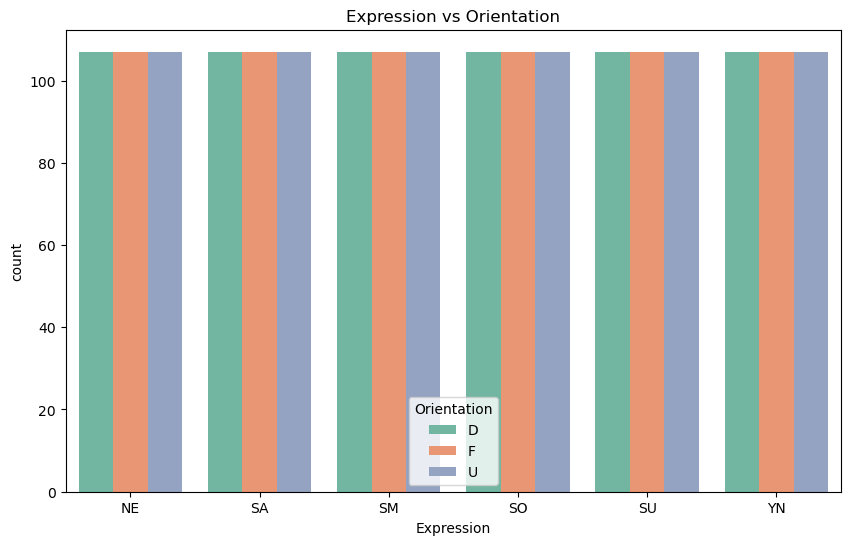

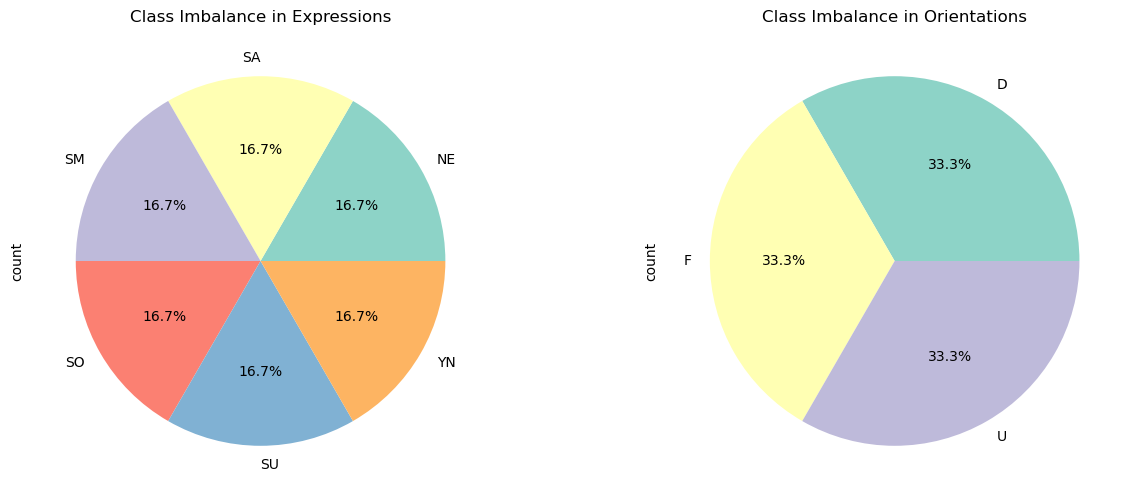

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# Load the dataset (assuming it's loaded as df)
df = pd.DataFrame(data, columns=['Subject ID', 'Expression', 'Orientation', 'File Path'])

# Basic overview of the dataset
print("Dataset Overview:")
print(df.info())  # Check for missing values, types, and number of rows/columns
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# 1. Distribution of Expressions
plt.figure(figsize=(8, 6))
sns.countplot(x='Expression', data=df, palette='Set2')
plt.title('Distribution of Expressions')
plt.show()

# 2. Distribution of Orientations
plt.figure(figsize=(8, 6))
sns.countplot(x='Orientation', data=df, palette='Set2')
plt.title('Distribution of Orientations')
plt.show()

# 3. Subject-wise Image Count
subject_counts = df['Subject ID'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
subject_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Images Per Subject')
plt.xlabel('Subject ID')
plt.ylabel('Number of Images')
plt.show()

# 4. Expression Count per Subject
subject_expression_count = df.groupby(['Subject ID', 'Expression']).size().unstack().fillna(0)
subject_expression_count.plot(kind='bar', stacked=True, figsize=(14, 7), cmap='Set2')
plt.title('Expression Distribution for Each Subject')
plt.xlabel('Subject ID')
plt.ylabel('Number of Images')
plt.legend(title='Expression')
plt.show()

# 5. Orientation Count per Expression
orientation_per_expression = df.groupby(['Expression', 'Orientation']).size().unstack().fillna(0)
orientation_per_expression.plot(kind='bar', stacked=True, figsize=(14, 7), cmap='Set1')
plt.title('Orientation Distribution for Each Expression')
plt.xlabel('Expression')
plt.ylabel('Number of Images')
plt.legend(title='Orientation')
plt.show()

# 6. Show random sample images
sample_images = random.sample(df['File Path'].tolist(), 5)
plt.figure(figsize=(12, 8))
for i, image_path in enumerate(sample_images, 1):
    img = Image.open(image_path)
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('Sample Images', fontsize=16)
plt.show()

# 7. Visualizing Expression & Orientation Relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Expression', hue='Orientation', data=df, palette='Set2')
plt.title('Expression vs Orientation')
plt.show()

# 8. Class Imbalance in Expression and Orientation
expression_counts = df['Expression'].value_counts()
orientation_counts = df['Orientation'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
expression_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=sns.color_palette('Set3', len(expression_counts)))
axes[0].set_title('Class Imbalance in Expressions')

orientation_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=sns.color_palette('Set3', len(orientation_counts)))
axes[1].set_title('Class Imbalance in Orientations')

plt.show()

# Correlation matrix (if any numeric columns exist)
# If you have any numeric features, you can visualize correlations like so:
# correlation_matrix = df.corr() 
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')



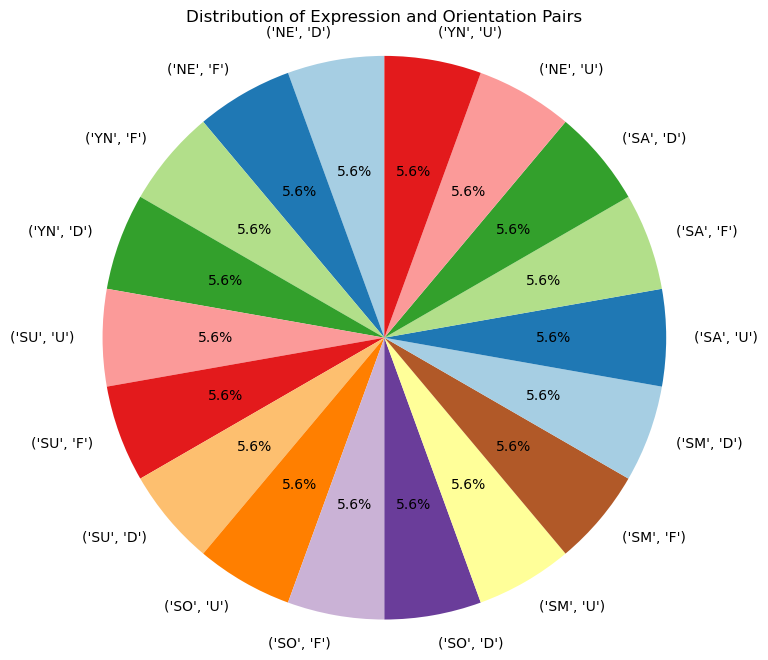

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Expression' and 'Orientation' columns
# Group the data by both 'Expression' and 'Orientation' and get the counts
expression_orientation_counts = df.groupby(['Expression', 'Orientation']).size()

# Sort the counts in descending order to visualize the largest segments
expression_orientation_counts = expression_orientation_counts.sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(expression_orientation_counts, labels=expression_orientation_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Expression and Orientation Pairs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [3]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize


preprocessed_data = []
labels = []


target_size = (100, 80)  # Resize to 100x80 pixels


base_path = "C:\\Users\\devar\\Downloads\\IIITM_Face_Emotion_dataset-20240908T082705Z-001\\IIITM_Face_Emotion_dataset"


for subject_id in range(1, 108):  # From SUB1 to SUB107
   
    if subject_id < 10:
        folder_name = f'SUB{subject_id}'
        file_prefix = f'SUB{subject_id}'
        expression_start = 4
        expression_end = 6
        orientation_index = 6
    elif subject_id < 100:
        folder_name = f'SUB{subject_id}'
        file_prefix = f'SUB{subject_id:02}'
        expression_start = 5
        expression_end = 7
        orientation_index = 7
    else:
        folder_name = f'SUB{subject_id}'
        file_prefix = f'SUB{subject_id:03}'
        expression_start = 6
        expression_end = 8
        orientation_index = 8

  
    folder_path = os.path.join(base_path, folder_name)

    # List all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.startswith(file_prefix):
            # Extract the expression and orientation from the file name
            expression = file_name[expression_start:expression_end]
            orientation = file_name[orientation_index]

           
            file_path = os.path.join(folder_path, file_name)

            
            image = imread(file_path)

            
            image_resized = resize(image, target_size, anti_aliasing=True)

           
            image_flattened = image_resized.flatten()

            
            preprocessed_data.append(image_flattened)
            labels.append(expression)


preprocessed_data = np.array(preprocessed_data)
labels = np.array(labels)


local_save_path_images = 'preprocessed_images.npy'
local_save_path_labels = 'labels.npy'


np.save(local_save_path_images, preprocessed_data)
np.save(local_save_path_labels, labels)

print(f"Preprocessing complete. Preprocessed data saved locally as '{local_save_path_images}' and '{local_save_path_labels}'.")


Preprocessing complete. Preprocessed data saved locally as 'preprocessed_images.npy' and 'labels.npy'.


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


preprocessed_images = np.load('preprocessed_images.npy')  # Local path for preprocessed images
labels = np.load('labels.npy')  # Local path for labels


label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, encoded_labels, test_size=0.3, random_state=42)


svm_model = SVC(kernel='linear', random_state=42)


svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)


print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy Score: 0.4826989619377163
Classification Report:
               precision    recall  f1-score   support

          NE       0.33      0.40      0.36        99
          SA       0.36      0.37      0.37        91
          SM       0.59      0.53      0.56        99
          SO       0.62      0.60      0.61       100
          SU       0.32      0.31      0.32        93
          YN       0.75      0.67      0.71        96

    accuracy                           0.48       578
   macro avg       0.49      0.48      0.49       578
weighted avg       0.50      0.48      0.49       578



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


preprocessed_images = np.load('preprocessed_images.npy')
labels = np.load('labels.npy')


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, encoded_labels, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1,1,10,100],            # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],    # Kernel coefficient for 'rbf' and 'poly' kernels
    'kernel': ['rbf', 'poly', 'linear'] # SVM kernel types
}

svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3, cv=3)

grid_search.fit(X_train, y_train)
=
print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_rep)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.171 total time=  55.9s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.171 total time=  59.2s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.169 total time=  54.7s
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.522 total time=  34.8s
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.481 total time=  34.3s
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.486 total time= 1.0min
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.533 total time= 1.3min
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.492 total time= 1.1min
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.492 total time=  54.5s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.171 total time= 1.4min
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.171 total time= 1.5min
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

preprocessed_images = np.load('preprocessed_images.npy')
labels = np.load('labels.npy')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, encoded_labels, test_size=0.3, random_state=42)

param_grid = {
    'C': [100],            # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],    # Kernel coefficient for 'rbf' and 'poly' kernels
    'kernel': ['rbf', 'poly', 'linear'] # SVM kernel types
}

svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3, cv=3)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_rep)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END ........C=100, gamma=1, kernel=rbf;, score=0.171 total time= 1.7min
[CV 2/3] END ........C=100, gamma=1, kernel=rbf;, score=0.171 total time= 1.7min
[CV 3/3] END ........C=100, gamma=1, kernel=rbf;, score=0.169 total time= 1.7min
[CV 1/3] END .......C=100, gamma=1, kernel=poly;, score=0.522 total time= 1.0min
[CV 2/3] END .......C=100, gamma=1, kernel=poly;, score=0.481 total time= 1.0min
[CV 3/3] END .......C=100, gamma=1, kernel=poly;, score=0.486 total time= 1.1min
[CV 1/3] END .....C=100, gamma=1, kernel=linear;, score=0.533 total time= 1.1min
[CV 2/3] END .....C=100, gamma=1, kernel=linear;, score=0.492 total time= 1.1min
[CV 3/3] END .....C=100, gamma=1, kernel=linear;, score=0.499 total time= 1.1min
[CV 1/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.158 total time= 1.7min
[CV 2/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.156 total time= 1.5min
[CV 3/3] END ......C=100, gamma=0.1, kernel=rbf;

In [9]:
expression_count = df.groupby('Expression').size()
print(expression_count)


Expression
NE    321
SA    321
SM    321
SO    321
SU    321
YN    321
dtype: int64


In [11]:
orientation_count = df.groupby('Orientation').size()
print(orientation_count)


Orientation
D    642
F    642
U    642
dtype: int64


In [13]:
expression_orientation_count = df.groupby(['Expression', 'Orientation']).size()
print(expression_orientation_count)


Expression  Orientation
NE          D              107
            F              107
            U              107
SA          D              107
            F              107
            U              107
SM          D              107
            F              107
            U              107
SO          D              107
            F              107
            U              107
SU          D              107
            F              107
            U              107
YN          D              107
            F              107
            U              107
dtype: int64


In [5]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize

preprocessed_data = []
labels = []

target_size = (224,224)  # Resize to 100x80 pixels

base_path = "C:\\Users\\devar\\Downloads\\IIITM_Face_Emotion_dataset-20240908T082705Z-001\\IIITM_Face_Emotion_dataset"

for subject_id in range(1, 108):  # From SUB1 to SUB107

    if subject_id < 10:
        folder_name = f'SUB{subject_id}'
        file_prefix = f'SUB{subject_id}'
        expression_start = 4
        expression_end = 6
        orientation_index = 6
    elif subject_id < 100:
        folder_name = f'SUB{subject_id}'
        file_prefix = f'SUB{subject_id:02}'
        expression_start = 5
        expression_end = 7
        orientation_index = 7
    else:
        folder_name = f'SUB{subject_id}'
        file_prefix = f'SUB{subject_id:03}'
        expression_start = 6
        expression_end = 8
        orientation_index = 8

    folder_path = os.path.join(base_path, folder_name)

    for file_name in os.listdir(folder_path):
        if file_name.startswith(file_prefix):
            
            expression = file_name[expression_start:expression_end]
            orientation = file_name[orientation_index]

            file_path = os.path.join(folder_path, file_name)

            image = imread(file_path)

            image_resized = resize(image, target_size, anti_aliasing=True)

            image_flattened = image_resized.flatten()

            preprocessed_data.append(image_flattened)
            labels.append(expression)

preprocessed_data = np.array(preprocessed_data)
labels = np.array(labels)

local_save_path_images = 'preprocessed_images.npy'
local_save_path_labels = 'labels.npy'

np.save(local_save_path_images, preprocessed_data)
np.save(local_save_path_labels, labels)

print(f"Preprocessing complete. Preprocessed data saved locally as '{local_save_path_images}' and '{local_save_path_labels}'.")

Preprocessing complete. Preprocessed data saved locally as 'preprocessed_images.npy' and 'labels.npy'.


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1936 - loss: 2.2887
Epoch 1: val_accuracy improved from -inf to 0.38083, saving model to vgg16_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.1939 - loss: 2.2819 - val_accuracy: 0.3808 - val_loss: 1.5749
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2570 - loss: 1.6383
Epoch 2: val_accuracy improved from 0.38083 to 0.40415, saving model to vgg16_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.2573 - loss: 1.6375 - val_accuracy: 0.4041 - val_loss: 1.4867
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2917 - loss: 1.5651
Epoch 3: val_accuracy improved from 0.40415 to 0.40933, saving model to vgg16_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.2919 - loss: 1.5645 - val_accuracy: 0.4093 - val_loss: 1.3824
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3287 - loss: 1.5158
Epoch 4: val_accuracy improved from 0.40

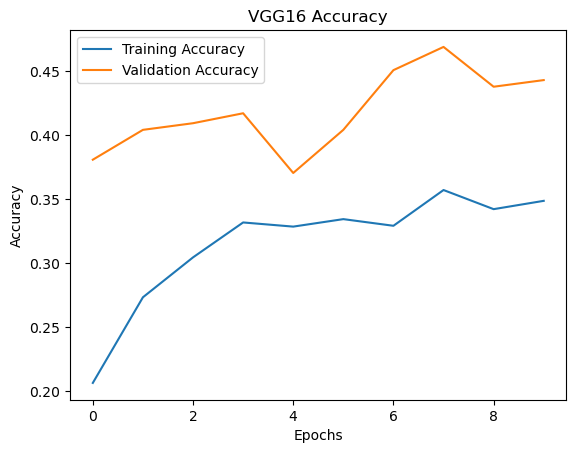

Model training complete and results saved.


In [15]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

preprocessed_data = np.load('preprocessed_images.npy')
labels = np.load('labels.npy')

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels, num_classes=len(np.unique(labels)))

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(preprocessed_data, categorical_labels, test_size=0.2, random_state=42)

# Reshape the preprocessed data to match VGG16's expected input (224, 224, 3)
X_train = X_train.reshape(-1, 224, 224, 3)
X_val = X_val.reshape(-1, 224, 224, 3)

# Load the VGG16 model, without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (do not train the pre-trained layers)
base_model.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Added dropout to prevent overfitting
x = Dense(64, activation='relu')(x)
output = Dense(categorical_labels.shape[1], activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks: ModelCheckpoint and EarlyStopping
checkpoint = ModelCheckpoint('vgg16_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[checkpoint, early_stopping])

# Save training history for comparison
vgg16_results = {
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy'],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}
np.save('vgg16_results.npy', vgg16_results)

# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('VGG16 Accuracy')
plt.show()

print("Model training complete and results saved.")


In [3]:
!pip install tensorflow


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.1648 - loss: 6.6316
Epoch 1: val_accuracy improved from -inf to 0.16580, saving model to resnet50_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.1648 - loss: 6.5731 - val_accuracy: 0.1658 - val_loss: 1.7919
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step - accuracy: 0.1605 - loss: 1.7921
Epoch 2: val_accuracy did not improve from 0.16580
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 966ms/step - accuracy: 0.1606 - loss: 1.7921 - val_accuracy: 0.1658 - val_loss: 1.7918
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 761ms/step - accuracy: 0.1593 - loss: 1.7922
Epoch 3: val_accuracy did not improve from 0.16580
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 954ms/step - accuracy: 0.1592 - loss: 1.7922 - val_accuracy: 0.1658 - val_loss: 1.7918
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.1734 - loss: 1.7922
Epoch 4: val_accuracy did not improve from 0.16580
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 926ms/step - accuracy: 0.1

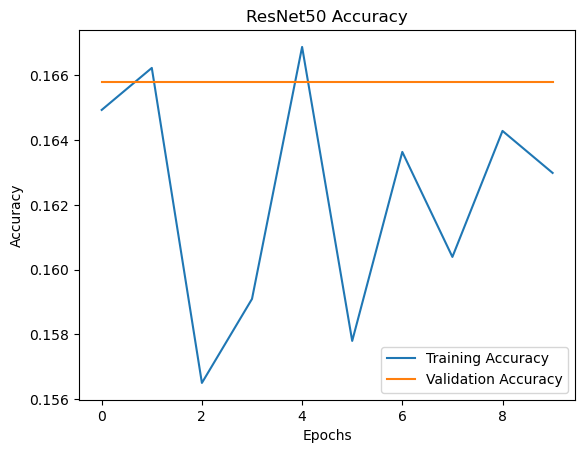

Model training complete and results saved.


In [26]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load preprocessed data
preprocessed_data = np.load('preprocessed_images.npy')
labels = np.load('labels.npy')

# Define emotion labels mapping
emotion_labels = {
    'NE': 0,  # Neutral
    'SA': 1,  # Sad
    'SM': 2,  # Smile
    'SO': 3,  # Surprise
    'SU': 4,  # Surprise with Open Mouth
    'YN': 5   # Yawning
}

# Convert string labels to integers using the emotion_labels mapping
integer_labels = np.array([emotion_labels[label] for label in labels])

# One-hot encode the integer labels
one_hot_labels = to_categorical(integer_labels, num_classes=len(emotion_labels))

# Split the dataset into training and validation sets (e.g., 80% training, 20% validation)
from sklearn.model_selection import train_test_split
# Normalize the image data to [0, 1] range
preprocessed_data = preprocessed_data.astype('float32') / 255.0

X_train, X_val, y_train, y_val = train_test_split(preprocessed_data, one_hot_labels, test_size=0.2, random_state=42, stratify=one_hot_labels)

# Reshape the data for ResNet50 (adding channel dimension)
X_train = X_train.reshape(-1, 224, 224, 3)
X_val = X_val.reshape(-1, 224, 224, 3)

# Load ResNet50 pre-trained model, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (do not train the pre-trained layers)
base_model.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(emotion_labels), activation='softmax')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('resnet50_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[checkpoint])

# Save training history for later comparison
resnet50_results = {
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy'],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}

# Save the result to a file for later comparison
np.save('resnet50_results.npy', resnet50_results)

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet50 Accuracy')
plt.show()

print("Model training complete and results saved.")


In [30]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load preprocessed data
preprocessed_data = np.load('preprocessed_images.npy')
labels = np.load('labels.npy')

# Define emotion labels mapping
emotion_labels = {
    'NE': 0,  # Neutral
    'SA': 1,  # Sad
    'SM': 2,  # Smile
    'SO': 3,  # Surprise
    'SU': 4,  # Surprise with Open mouth
    'YN': 5   # Yawning
}

# Convert string labels to integers
integer_labels = np.array([emotion_labels[label] for label in labels])

# One-hot encode the integer labels
one_hot_labels = to_categorical(integer_labels, num_classes=len(emotion_labels))

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(preprocessed_data, one_hot_labels, test_size=0.2, random_state=42, stratify=one_hot_labels)

# Reshape data for InceptionV3 input
X_train = X_train.reshape(-1, 224, 224, 3)
X_val = X_val.reshape(-1, 224, 224, 3)

# Load InceptionV3 pre-trained model, without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (do not train the pre-trained layers)
base_model.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(emotion_labels), activation='softmax')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks: ModelCheckpoint and EarlyStopping
checkpoint = ModelCheckpoint('inceptionv3_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[checkpoint, early_stopping])

# Save training history for later comparison
inceptionv3_results = {
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy'],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}

# Save the result to a file for later comparison
np.save('inceptionv3_results.npy', inceptionv3_results)

print("Model training complete and results saved.")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.2503 - loss: 11.1327
Epoch 1: val_accuracy improved from -inf to 0.42228, saving model to inceptionv3_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 624ms/step - accuracy: 0.2518 - loss: 11.0330 - val_accuracy: 0.4223 - val_loss: 1.8435
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.5487 - loss: 1.3683
Epoch 2: val_accuracy improved from 0.42228 to 0.45855, saving model to inceptionv3_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 524ms/step - accuracy: 0.5491 - loss: 1.3653 - val_accuracy: 0.4585 - val_loss: 1.7465
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.6978 - loss: 0.7961
Epoch 3: val_accuracy improved from 0.45855 to 0.46632, saving model to inceptionv3_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 479ms/step - accuracy: 0.6981 - loss: 0.7951 - val_accuracy: 0.4663 - val_loss: 1.4563
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━

In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load preprocessed data
preprocessed_data = np.load('preprocessed_images.npy')
labels = np.load('labels.npy')

# Define emotion labels mapping
emotion_labels = {
    'NE': 0,  # Neutral
    'SA': 1,  # Sad
    'SM': 2,  # Smile
    'SO': 3,  # Surprise
    'SU': 4,  # Surprise with Open mouth
    'YN': 5   # Yawning
}

# Convert string labels to integers
integer_labels = np.array([emotion_labels[label] for label in labels])

# One-hot encode the integer labels
one_hot_labels = to_categorical(integer_labels, num_classes=len(emotion_labels))

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(preprocessed_data, one_hot_labels, test_size=0.2, random_state=42, stratify=one_hot_labels)

# Reshape data for InceptionV3 input
X_train = X_train.reshape(-1, 224, 224, 3)
X_val = X_val.reshape(-1, 224, 224, 3)

# Load InceptionV3 pre-trained model, without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (do not train the pre-trained layers)
base_model.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(emotion_labels), activation='softmax')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks: ModelCheckpoint and EarlyStopping
checkpoint = ModelCheckpoint('inceptionv3_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[checkpoint, early_stopping])

# Save training history for later comparison
inceptionv3_results = {
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy'],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}

# Save the result to a file for later comparison
np.save('inceptionv3_results.npy', inceptionv3_results)

print("Model training complete and results saved.")


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.2493 - loss: 12.2186
Epoch 1: val_accuracy improved from -inf to 0.44560, saving model to inceptionv3_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 519ms/step - accuracy: 0.2506 - loss: 12.1075 - val_accuracy: 0.4456 - val_loss: 1.7512
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.6152 - loss: 1.0846
Epoch 2: val_accuracy did not improve from 0.44560
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 443ms/step - accuracy: 0.6147 - loss: 1.0854 - val_accuracy: 0.3731 - val_loss: 2.3575
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.6082 - loss: 1.0763
Epoch 3: val_accuracy improved from 0.44560 to 0.52591, saving model to inceptionv3_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 474ms/step - accuracy: 0.6090 - loss: 1.0737 - val_accuracy: 0.5259 - val_loss: 1.6901
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.8173 - loss: 0.5089
Epoch 4: val_accuracy did not improve from 0.52591

In [9]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load preprocessed data
preprocessed_data = np.load('preprocessed_images.npy')
labels = np.load('labels.npy')

# Define emotion labels mapping
emotion_labels = {
    'NE': 0,  # Neutral
    'SA': 1,  # Sad
    'SM': 2,  # Smile
    'SO': 3,  # Surprise
    'SU': 4,  # Surprise with Open mouth
    'YN': 5   # Yawning
}

# Convert string labels to integers
integer_labels = np.array([emotion_labels[label] for label in labels])

# One-hot encode the integer labels
one_hot_labels = to_categorical(integer_labels, num_classes=len(emotion_labels))

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(preprocessed_data, one_hot_labels, test_size=0.2, random_state=42, stratify=one_hot_labels)

# Reshape data for InceptionV3 input
X_train = X_train.reshape(-1, 224, 224, 3)
X_val = X_val.reshape(-1, 224, 224, 3)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# Load InceptionV3 pre-trained model, without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
base_model.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
output = Dense(len(emotion_labels), activation='softmax')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with a lower learning rate for better fine-tuning
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Unfreeze the top layers of the base model for fine-tuning
for layer in base_model.layers[-30:]:  # Unfreeze the last 30 layers for fine-tuning
    layer.trainable = True

# Define callbacks: ModelCheckpoint and EarlyStopping
checkpoint = ModelCheckpoint('inceptionv3_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

# Train the model with data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,  # Increased epochs for fine-tuning
    callbacks=[checkpoint, early_stopping]
)

# Save training history for later comparison
inceptionv3_results = {
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy'],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}

# Save the result to a file for later comparison
np.save('inceptionv3_results.npy', inceptionv3_results)

print("Model training complete and results saved.")


Epoch 1/20


C:\Users\devar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.1754 - loss: 2.1309
Epoch 1: val_accuracy improved from -inf to 0.26166, saving model to inceptionv3_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 746ms/step - accuracy: 0.1756 - loss: 2.1267 - val_accuracy: 0.2617 - val_loss: 1.6824
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.2171 - loss: 1.7113
Epoch 2: val_accuracy improved from 0.26166 to 0.35492, saving model to inceptionv3_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 703ms/step - accuracy: 0.2171 - loss: 1.7111 - val_accuracy: 0.3549 - val_loss: 1.5662
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.2697 - loss: 1.6601
Epoch 3: val_accuracy improved from 0.35492 to 0.37565, saving model to inceptionv3_best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 706ms/step - accuracy: 0.2699 - loss: 1.6598 - val_accuracy: 0.3756 - val_loss: 1.4959
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.2657 - loss: 1.6079
Epoch 4: val_